# Monte Carlo By Examples

[Edward Lu](https://github.com/edwardlu71/notebooks)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from datetime import datetime
random.seed(datetime.now())

## Calculate $\large \pi$

In [2]:
def calculate_pi(samples):
    in_circle = 0
    for _ in range(samples):
        x = random.random()
        y = random.random()
        if math.sqrt(x**2 + y**2) < 1:
            in_circle += 1
    pi = float(in_circle) / samples * 4
    print(f"estimated pi = {pi} from {samples} samples")    

In [3]:
samples = 1000000
calculate_pi(samples)

estimated pi = 3.142448 from 1000000 samples


## Calculate Integral $$ \int_{-1}^{1}e^{-x^2} = \sqrt{\pi} * Erf(1) $$

In [4]:
def distribution_func(x):
    return math.exp(-x**2)

In [5]:
def calculate_integral(samples):
    under_curve = 0
    for _ in range(samples):
        x = random.random()
        y = random.random()
        if y < distribution_func(x):
            under_curve += 1
    result = float(under_curve) / samples * 2
    print(f"estimated result = {result} from {samples} samples; accurate result = {math.erf(1) * math.sqrt(math.pi)}")    

In [6]:
samples = 100000
calculate_integral(samples)

estimated result = 1.49556 from 100000 samples; accurate result = 1.493648265624854


## Random Walks

In [7]:
def random_walk(steps):
    x, y = 0, 0
    for _ in range(steps):
        (dx, dy) = random.choice([(0, 1), (0, -1), (1, 0), (-1, 0)])
        x += dx
        y += dy
    return (x, y)    

In [8]:
def random_walk_histogram(samples, steps):
    distances = []
    for _ in range(samples):
        walk = random_walk(steps)
        distances.append(abs(walk[0]) + abs(walk[1]))
    fig, ax = plt.subplots(figsize=(20, 5))
    plt.hist(distances, bins=range(steps))
    plt.xlabel("Distance")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

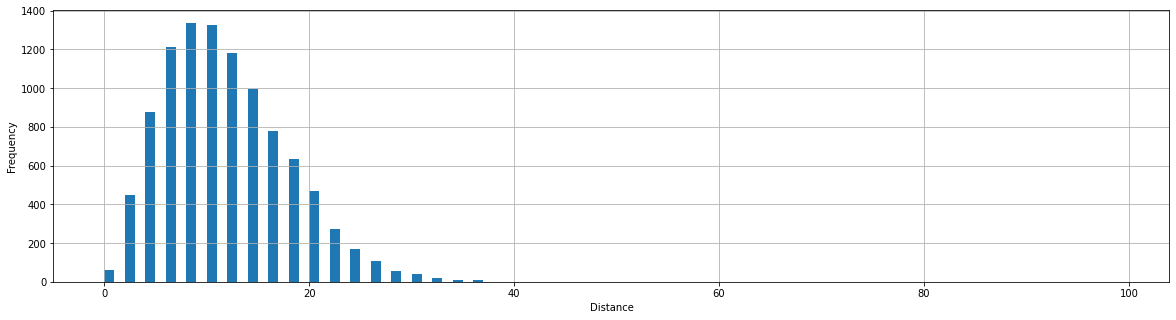

In [9]:
random_walk_histogram(10000, 100)

# Rabbit Catching

##### There are five rabbit holes in one line numbered from 1 to 5. A rabbit always sleeps in one of them and move to the next one on next day. If a farmer waits at hole #3, what's the expected days he can catch the rabbit.

In [10]:
number_of_holes = 5
waiting_at_hole = 3

def rabbit_walk():
    days = 1
    hole = random.randint(1, number_of_holes) # first day
    while hole != waiting_at_hole:
        if hole == 1:
            hole = 2
        elif hole == number_of_holes:
            hole = number_of_holes - 1
        else:
            hole += random.choice([-1, 1])
        days += 1
    return days

def rabbit_catch_histogram(samples):
    caught_on_day = []
    for _ in range(samples):
        caught_on_day.append(rabbit_walk())
    print(f"maximum simulation days {max(caught_on_day)}")
    print(f"average simulation days {sum(caught_on_day)/samples}")
    fig, ax = plt.subplots(figsize=(20, 4))
    plt.hist(caught_on_day, bins=max(caught_on_day), edgecolor='black', linewidth=1)
    plt.xlabel("days")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()      

maximum simulation days 42
average simulation days 3.797222


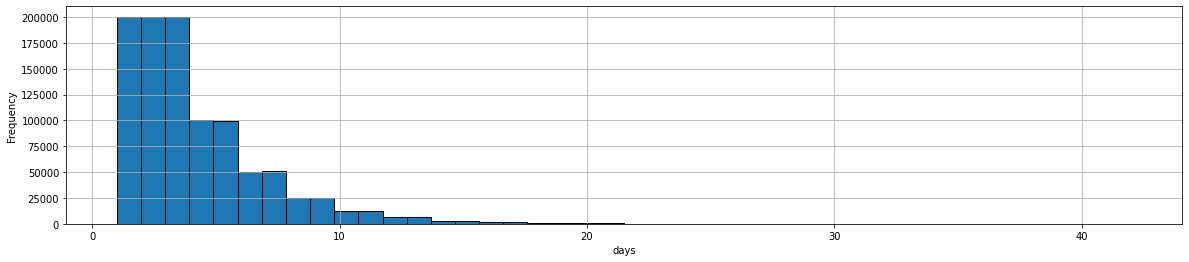

In [11]:
rabbit_catch_histogram(1000000)

##### Giving condition there are 2k+1 holes in one line, and the farmer waits at the hole #k+1. show the graph of the expected days vs k

In [12]:
def rabbit_walk_k(k):
    number_of_holes = 2 * k + 1
    waiting_at_hole = k + 1
    days = 1
    hole = random.randint(1, number_of_holes) # first day
    while hole != waiting_at_hole:
        if hole == 1:
            hole = 2
        elif hole == number_of_holes:
            hole = number_of_holes - 1
        else:
            hole += random.choice([-1, 1])
        days += 1
    return days

def rabbit_catch_k(samples, k):
    caught_on_day = []
    for _ in range(samples):
        caught_on_day.append(rabbit_walk_k(k))
    return sum(caught_on_day)/samples

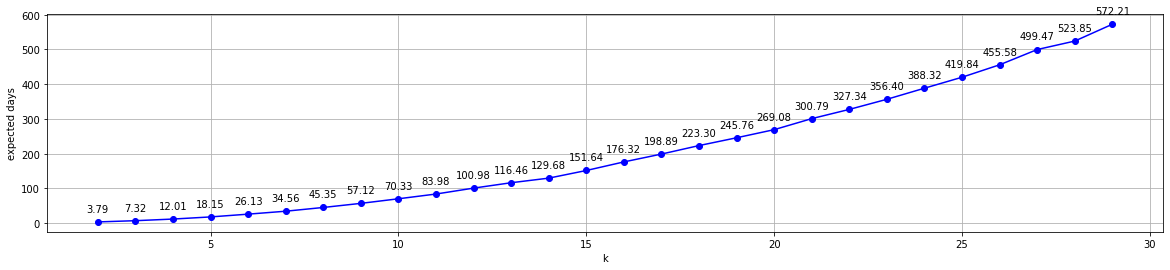

In [13]:
samples = 10000
ks = list(range(2, 30))
func_ks = []
for i in ks:
    func_ks.append(rabbit_catch_k(samples, i))
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(ks, func_ks, 'bo-')
for x, y in zip(ks, func_ks):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center    
plt.xlabel("k")
plt.ylabel("expected days")
plt.grid(True)
plt.show()

In [14]:
def rabbit_catch_histogram_k(samples, k):
    caught_on_day = []
    for _ in range(samples):
        caught_on_day.append(rabbit_walk_k(k))
    print(f"maximum simulation days {max(caught_on_day)}")
    print(f"average simulation days {sum(caught_on_day)/samples}")
    fig, ax = plt.subplots(figsize=(20, 4))
    plt.hist(caught_on_day, bins=min(max(caught_on_day),50), edgecolor='black', linewidth=1)
    plt.xlabel("days")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()      

maximum simulation days 86
average simulation days 7.30321


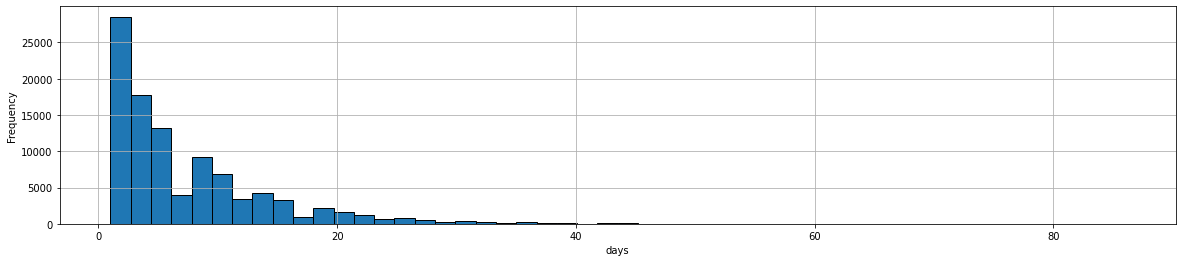

In [15]:
rabbit_catch_histogram_k(100000, 3)

### Analytic Solution for Rabbit Catching Problem

Assume there are 2k+1 holes, and the farmer is waiting at hole #k+1. The analytic formula for the expected number of days vs k is:

In [16]:
from sympy import init_printing, symbols, simplify, expand, Matrix
from IPython.display import display
init_printing()

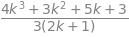

In [17]:
k = symbols('k')
f = k*(4*k-1)*(k+1)/3/(2*k+1) + 1
simplify(expand(f))

In [18]:
e2 = f.subs(k,2) # 5 holes
e3 = f.subs(k,3) # 7 holes
display(e2, e2.p/e2.q, e3, e3.p/e3.q)

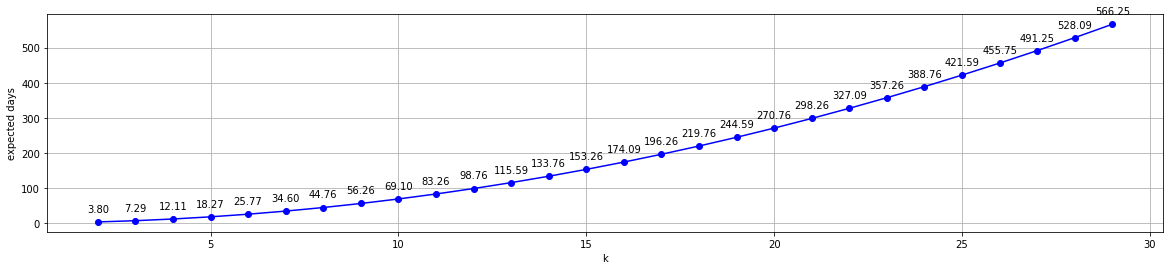

In [19]:
ks1 = list(range(2, 30))
func_ks1 = []
for i in ks1:
    e = f.subs(k, i)
    func_ks1.append(e.p/e.q)
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(ks1, func_ks1, 'bo-')
for x, y in zip(ks1, func_ks1):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center    
plt.xlabel("k")
plt.ylabel("expected days")
plt.grid(True)
plt.show()

##### Hints: it's a limited space one dimension random walk problem

$$ \begin{align} M \cdot E & = I \\ E & = M^{-1} \cdot I \end{align} \tag{1} $$

*give me a call if you want to know from where and how the formula was derived :)*

In [20]:
# hints!! (k=6)
M = Matrix([[1,-1,0,0,0,0],[-1/2,1,-1/2,0,0,0],[0,-1/2,1,-1/2,0,0],[0,0,-1/2,1,-1/2,0],[0,0,0,-1/2,1,-1/2],[0,0,0,0,-1/2,1]])
display(M)
display(M.inv())

⎡ 1     -1    0     0     0     0  ⎤
⎢                                  ⎥
⎢-0.5   1    -0.5   0     0     0  ⎥
⎢                                  ⎥
⎢ 0    -0.5   1    -0.5   0     0  ⎥
⎢                                  ⎥
⎢ 0     0    -0.5   1    -0.5   0  ⎥
⎢                                  ⎥
⎢ 0     0     0    -0.5   1    -0.5⎥
⎢                                  ⎥
⎣ 0     0     0     0    -0.5   1  ⎦

⎡6.0  10.0  8.0  6.0  4.0  2.0⎤
⎢                             ⎥
⎢5.0  10.0  8.0  6.0  4.0  2.0⎥
⎢                             ⎥
⎢4.0  8.0   8.0  6.0  4.0  2.0⎥
⎢                             ⎥
⎢3.0  6.0   6.0  6.0  4.0  2.0⎥
⎢                             ⎥
⎢2.0  4.0   4.0  4.0  4.0  2.0⎥
⎢                             ⎥
⎣1.0  2.0   2.0  2.0  2.0  2.0⎦

# Baker's Problem
##### A small town has 6 residents with a baker. The baker makes \\$1 profit to sell a cake but it costs the baker \\$0.4 if a cake is not sold on the day. If each resident buy maximum one cake from the baker everyday, how many cakes should the baker make for the maximum profits?

*I am going to sell this formula and codes to the restaurant in Eastwood for a free lunch :)*

##### Monte Carlo method not very good for this problem

In [21]:
cost = 0.4
price = 1.4

def calculate_profilt(residents, samples):
    n  = residents - 1 # maximum customers
    pc = np.zeros(residents)
    for _ in range(samples):
        made_cakes = random.randint(0,n)
        custumers_number = random.randint(0,n)
        if made_cakes > custumers_number:
            pc[made_cakes] += price * custumers_number - cost * made_cakes
        else:
            pc[made_cakes] += (price - cost) * made_cakes
    return np.argsort(pc)[-1]

In [22]:
calculate_profilt(6, 100000)

4

#### Exhaustive Algorithm

profits vs cakes [ 0.   4.6  7.8  9.6 10.   9. ]
the baker can make 4 cakes each day for the expected maximum profit


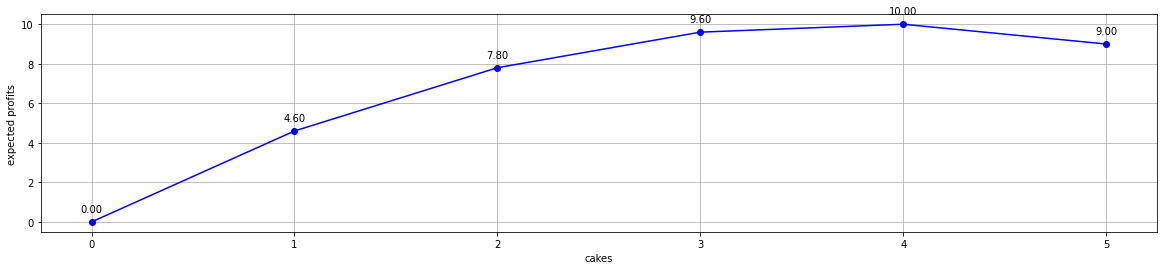

In [23]:
residents = 6    # residents number
cost = 0.4
price = 1.4

n  = residents - 1 # maximum customers
p = np.zeros((residents,residents))
for customer in range(residents):
    for cake in range(residents):
        if cake > customer:
            p[customer][cake] = price * customer - cost * cake
        else:
            p[customer][cake] = (price - cost) * cake

profits_cakes = p.sum(axis=0)
print(f"profits vs cakes {profits_cakes}")
print(f"the baker can make {np.argsort(profits_cakes)[-1]} cakes each day for the expected maximum profit")

xs = list(range(residents))
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(xs, profits_cakes, 'bo-')
for x, y in zip(xs, profits_cakes):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center    
plt.xlabel("cakes")
plt.ylabel("expected profits")
plt.grid(True)
plt.show()

#### Analytic Solution

$$ profit(cakes) = \sum_{customers=0}^{N} \left\{
\begin{array}{ll}
      price * customers - cost * cakes & cakes \gt customers \\
      (price - cost) * cakes & cakes \leq customers \\
\end{array} 
\right.  $$
$$ profit(cakes) = \sum_{customers=0}^{cakes} (price * customers - cost * cakes) + \sum_{customers=cakes+1}^{N} (price - cost) * cakes$$

$$ \frac{D_{profit}}{D_{cakes}} = 0 $$

In [24]:
from sympy import init_printing, symbols, simplify, expand, diff, solve
from IPython.display import display
init_printing()

maximum point at: cakes = 3.78571428571429, profit for 3 cakes = 9.60000000000000, for 4 cakes = 10.0000000000000


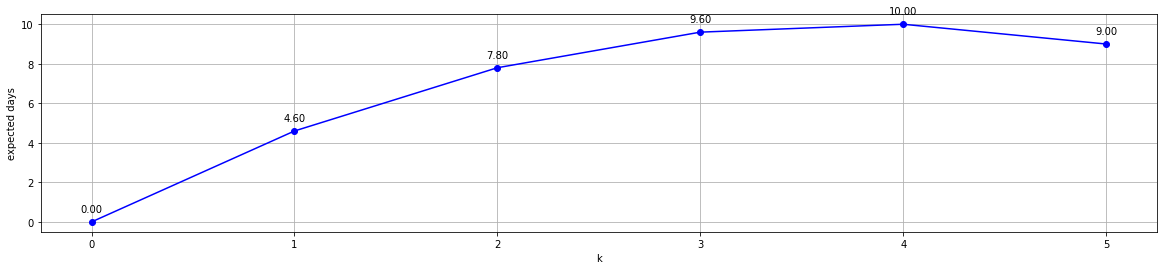

In [25]:
residents = 6    # residents number
cost = 0.4
price = 1.4

cakes = symbols('cakes')
p = 0.3*(cakes+1)*cakes + (residents-1-cakes)*cakes
display(simplify(p))
display(diff(p))

v = solve(diff(p))
print(f"maximum point at: cakes = {v[0]}, profit for {v[0].floor()} cakes = {p.subs(cakes,v[0].floor())}, for {v[0].ceiling()} cakes = {p.subs(cakes,v[0].ceiling())}")

xs = list(range(residents))
ys = [float(p.subs(cakes, i)) for i in xs]

fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(xs, ys, 'bo-')
for x, y in zip(xs, ys):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center    
plt.xlabel("k")
plt.ylabel("expected days")
plt.grid(True)
plt.show()

# Alien's Problem
##### An alien lands on earth. Every day after that, each alien on earth undergoing transformation, which could be any of the four equally events: a) the alien dies b) the alien does nothing c) the alien replicate itself to 2 in total d) the alien replicates itself to 3 in total. What's the probability alien race die out and goes extinct?

*I am going to sell this codes and formula to Elon Musk! He needs it on Mars :))

In [26]:
threshold = 100 # assume the population above this threshold number will never go extinct

def extinct(samples):
    extincted = 0
    for _ in range(samples):
        population = 1
        while population > 0 and population < threshold:
            s = 0
            for _ in range(1, population+1):
                s += random.choice([0, 1, 2, 3])
            population = s
        if population == 0:
            extincted += 1
    return extincted/samples

In [27]:
extinct(100000)

### Analytic Solution
$$ \frac{1}{4}(1+p+p^{2}+p^{3}) = p $$

In [28]:
from sympy import init_printing, symbols, simplify, expand, Matrix, factor, solve
from IPython.display import display
init_printing()

In [29]:
p = symbols('p')
f = p**3+p**2-3*p+1
display(factor(f))
R = solve(f)
display(R, R[1].round(3))

# Passengers Problem
N passengers each with a ticket for a seat on a bus. Find out how many different ways everybody is not sitting on his/her own seat.

In [30]:
import numpy as np

def percentage_nobody_in_right_seat(seats, samples):
    tickets = list(range(seats))
    count = 0
    for _ in range(samples):
        if not any([x==y for x, y in zip(np.random.permutation(tickets).tolist(), tickets)]):
            count += 1
    return count/samples

In [31]:
percentage_nobody_in_right_seat(100,100000)

### Analytic Solution
consider passenger pi sits into seat \#1, and if passenger p1 is sitting in seat \#i then it equals to (n-2) size of same problem; if passenger is not in seat \#i we then assume passenger p1 is a new pi in the (n-1) size of the same problem. Thus we have recurrence relation
$$ P_{n} = (n-1)(P_{n-1}+P_{n-2}) $$
Assume the exclusive permutaion $P_{n}$ is a fraction of n!, say $P_{n} = \large t_{n}n!$ where $ t_{n} < 0$
$$ \large t_{n} - t_{n-1} = \frac{(-1)^{n}}{n!} $$

$$ P_{n} = \large n! \sum_{k=0}^{n} \frac{(-1)^{k}}{k!} $$

In [32]:
def P(n):
    s = 0
    for k in range(n+1):
        s += (-1)**k/math.factorial(k)
    return int(math.factorial(n)*s)       

2 1 	 2.0
3 2 	 3.0
4 9 	 2.6666666666666665
5 44 	 2.727272727272727
6 265 	 2.7169811320754715
7 1854 	 2.7184466019417477
8 14833 	 2.7182633317602645
9 133496 	 2.71828369389345
10 1334961 	 2.7182816576664037
11 14684570 	 2.7182818427778273
12 176214841 	 2.7182818273518743
13 2290792932 	 2.718281828538486
14 32071101049 	 2.718281828453728
15 481066515734 	 2.7182818284593786
16 7697064251745 	 2.7182818284590256
17 130850092279664 	 2.7182818284590464
18 2355301661033953 	 2.718281828459045
19 44750731559645120 	 2.718281828459044


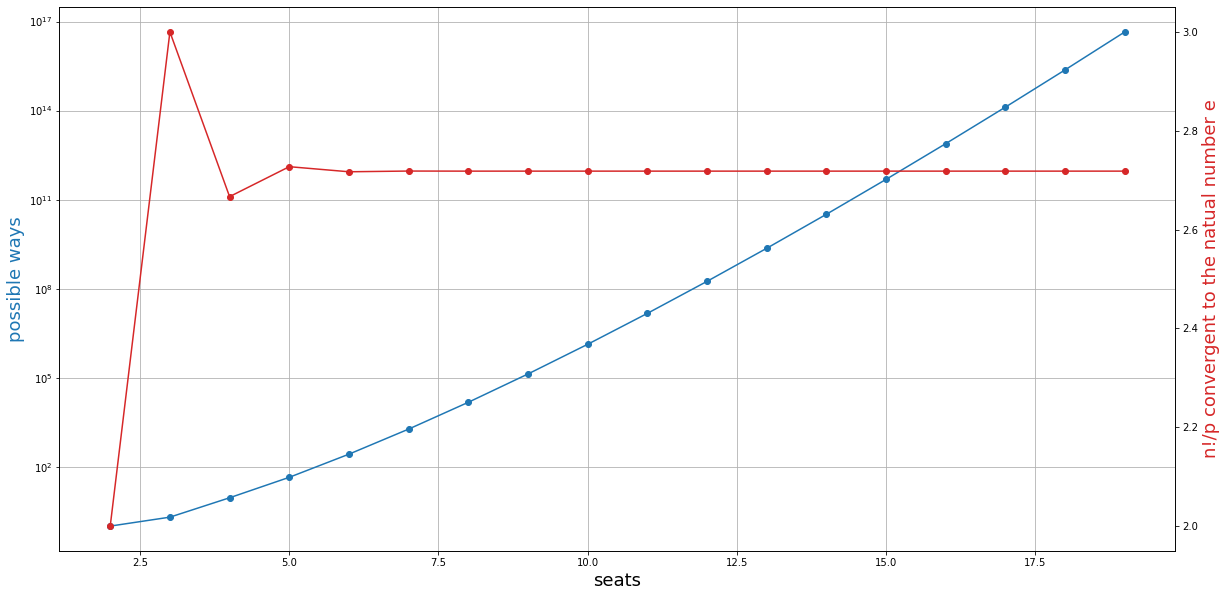

In [33]:
seats = 20 
ns = list(range(2, seats))
ps = list()
es = list()

for i in ns:
    pv = P(i)
    ps.append(pv)
    e = 'NIL'  # 1/percentage -> e when n->oo
    if pv != 0:
        e = math.factorial(i)/pv
        es.append(e)
    else:
        es.append(0)
    print(i, pv, '\t', e)
    
# plot
fig, ax = plt.subplots(figsize=(20, 10))
color = 'tab:blue'
ax.set_yscale('log')
ax.plot(ns, ps,  'o-', color=color)
ax.set_ylabel('possible ways', color=color, fontsize=18)
ax.set_xlabel('seats', color='black', fontsize=18)
ax.xaxis.grid()
ax.yaxis.grid()
color = 'tab:red'
ax2 = ax.twinx()
ax2.plot(ns, es,  'o-', color=color)
ax2.set_ylabel('n!/p convergent to the natual number e', color=color, fontsize=18)
plt.show()    

#### Exhaustive Verification of the formula

In [34]:
import itertools
def exclusive_permutation(n):
    permut = list(itertools.permutations(set(range(n)), n))
    excluded_permut = list()
    for e in permut:
        for i in range(n):
            if i == e[i]:
                break
        else:
            excluded_permut.append(e)
    return (n, len(excluded_permut), math.factorial(n), math.factorial(n)/len(excluded_permut))

In [35]:
for i in range(2,10):
    print(exclusive_permutation(i))

(2, 1, 2, 2.0)
(3, 2, 6, 3.0)
(4, 9, 24, 2.6666666666666665)
(5, 44, 120, 2.727272727272727)
(6, 265, 720, 2.7169811320754715)
(7, 1854, 5040, 2.7184466019417477)
(8, 14833, 40320, 2.7182633317602645)
(9, 133496, 362880, 2.71828369389345)
